In [43]:
#!pip install geopandas

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

# Identificación de Oportunidades Comerciales en Rehabilitación Energética

## Problema
El cumplimiento de las normativas energéticas de **2030** y **2033** requiere rehabilitar miles de edificios residenciales.  
**Constructoras**, **financieras** y **administraciones públicas** necesitan priorizar sus recursos en proyectos con alto retorno económico y social, pero actualmente no tienen herramientas para hacerlo de forma eficiente.

## Datos y Variable a Predecir
He recopilado datos de edificios residenciales en Bilbao que incluyen:
- Calificaciones energéticas actuales y post-intervención.
- Costos por metro cuadrado.
- Características como número de viviendas, altura, etc.

### Variable a Predecir:
**Plazo de intervención**, clasificando los edificios en:
1. **2030**
2. **2033**
3. **No cumplen**

## Impacto
Este modelo ayudará a:
- **Constructoras:** Identificar proyectos rentables.
- **Financieras:** Evaluar el riesgo y diseñar productos específicos.
- **Administraciones públicas:** Focalizar ayudas en barrios prioritarios.

Así, se optimizarán recursos y se acelerará el cumplimiento de los objetivos climáticos.


## Descripción de los Datos

Los datos utilizados en este proyecto han sido obtenidos de la plataforma **Urban3R** ([urban3r.es](https://urban3r.es)), una herramienta promovida por la Dirección General de Agenda Urbana y Arquitectura del Ministerio de Transportes, Movilidad y Agenda Urbana del Gobierno de España. Esta herramienta está diseñada para impulsar la regeneración urbana en España, alineándose con la **Estrategia de Rehabilitación Energética en Edificios en España (ERESEE 2020)**.

### Campos Clave de los Datos
1. **Identificación:**
   - `referencia_catastral`: Código catastral del edificio.
   - `nombre_municipio`, `codigo_ine`, `codigo_provincia`: Información geográfica básica.

2. **Características del Edificio:**
   - `uso_principal`: Uso principal del inmueble.
   - `altura_maxima`, `altura_maxima_categoria`: Número de plantas y su categoría.
   - `tipologia_edificio`: Tipología estructural del edificio.
   - `ano_construccion`, `ano_construccion_categoria`: Año de construcción y su categoría.

3. **Eficiencia Energética:**
   - `demanda_calefaccion`: Demanda energética actual (kWh/m²·año).
   - `demanda_calefaccion_post_intervencion`: Demanda energética tras la intervención (kWh/m²·año).
   - `calificacion_demanda_calefaccion`: Calificación energética actual.
   - `calificacion_demanda_calefaccion_post_intervencion`: Calificación energética tras la intervención.

4. **Costos de Intervención:**
   - `coste_intervencion_m2`: Costo estimado por metro cuadrado.
   - `coste_intervencion_viv`: Costo estimado por vivienda.

### Fuente
La información y los datos se han generado mediante la herramienta **urbanZEB**, desarrollada por **Cíclica [space · community · ecology]**. Más detalles sobre la metodología y segmentación de los datos pueden consultarse en los documentos oficiales:
- [Segmentación del Parque Residencial en Clústeres Tipológicos](https://cdn.mitma.gob.es/portal-web-drupal/planes_estartegicos/1_2020_segmentacion_parque_residencial_clusteres.pdf)
- [Aproximación a la Demanda Energética Residencial para Calefacción en España](https://cdn.mitma.gob.es/portal-web-drupal/planes_estartegicos/2_2020_aproximacion_demanda_residencial.pdf)

Este dataset ofrece una base sólida para analizar y priorizar rehabilitaciones energéticas a nivel de edificio.


# Identificación de Oportunidades Comerciales en Rehabilitación Energética en Bilbao

## Descripción del Proyecto

Este proyecto utiliza Machine Learning para clasificar edificios residenciales en Bilbao según su **potencial de rehabilitación energética**. El objetivo es identificar oportunidades comerciales y priorizar intervenciones para:
- **Constructoras:** Maximizar el retorno económico de los proyectos.
- **Financieras:** Evaluar edificios de bajo riesgo y alto retorno para productos financieros específicos.
- **Administraciones públicas:** Focalizar ayudas en zonas con mayor necesidad y alto impacto social.

## Contexto del Proyecto

El objetivo del proyecto es **priorizar intervenciones** de rehabilitación energética para alcanzar los estándares normativos en **Edificios Residenciales** en Bilbao.

### Requisitos Normativos
Según la **Directiva Europea de Eficiencia Energética** y su implementación en España:
- **2030:** Las viviendas deben alcanzar una calificación energética mínima de **E** para poder ser vendidas o alquiladas.
- **2033:** La exigencia sube a una calificación energética mínima de **D**.

Fuente: [Directiva 2010/31/UE y Plan Nacional Integrado de Energía y Clima (PNIEC)](https://www.miteco.gob.es/es/cambio-climatico/temas/energia-y-clima/pniec.aspx).

### Objetivo General
Mejorar la **eficiencia energética** en el sector residencial, que actualmente representa una proporción significativa del consumo energético y las emisiones de carbono.

Este análisis se enfoca en identificar los edificios prioritarios para intervención, optimizando el impacto social, económico y ambiental.

## Variable a Predecir
**Plazo de intervención (`plazo_intervencion`)**:  
- `2030`: Edificios con intervenciones rápidas y rentables.
- `2033`: Edificios con intervenciones más complejas o costosas.
- `No cumple`: Edificios que no alcanzan los objetivos normativos.

Este análisis busca optimizar la planificación y ejecución de las rehabilitaciones energéticas, facilitando la toma de decisiones estratégicas en sectores clave.


## Importancia del Sector Residencial en Emisiones y Consumo Energético

El sector residencial tiene un impacto significativo en el consumo energético y las emisiones de CO₂ en España:

### **1. Emisiones de CO₂ por Sector**
El sector residencial contribuye de manera importante a las emisiones totales de CO₂ en España:
[Distribución de Emisiones de CO₂ por Sector](https://www.energiaysociedad.es/wp-content/uploads/2018/05/Emisiones-CO2-por-sector.png)
- **Fuente:** [Energía y Sociedad](https://www.energiaysociedad.es/asi-se-reparten-las-emisiones-de-co2-entre-los-principales-sectores-de-espana/)

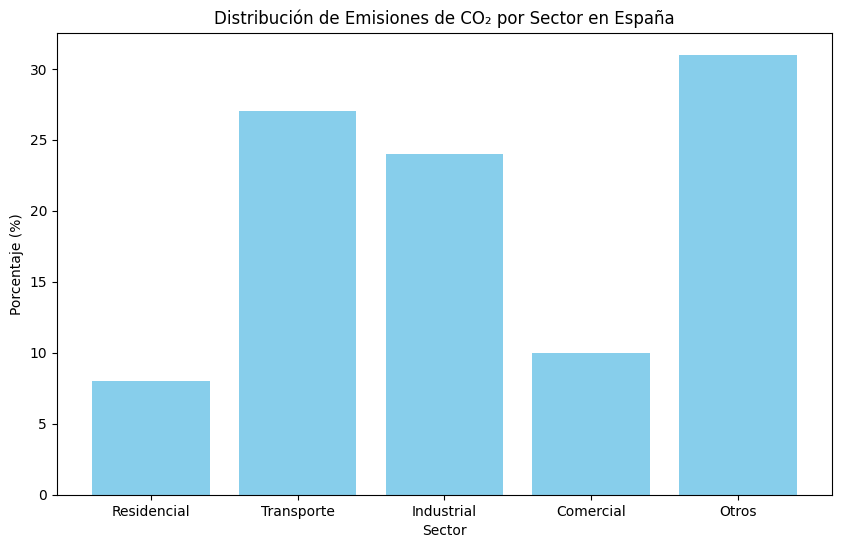

In [45]:
# Datos aproximados para emisiones de CO₂ por sector
sectors = ['Residencial', 'Transporte', 'Industrial', 'Comercial', 'Otros']
emissions = [8, 27, 24, 10, 31]  # Porcentajes aproximados

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(sectors, emissions, color='skyblue')
plt.title('Distribución de Emisiones de CO₂ por Sector en España')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Sector')
plt.show()


### **2. Consumo Energético por Uso**
En los hogares españoles, el consumo energético se distribuye principalmente en:
- **Calefacción:** 47%.
- **Agua caliente sanitaria:** 18%.
- **Electrodomésticos y cocina:** 26%.
- **Iluminación y otros usos:** 9%.
[Distribución del Consumo Energético en el Hogar](https://www.idae.es/sites/default/files/energia_residencial_idae_0.jpg)
- **Fuente:** [IDAE](https://www.idae.es/uploads/documentos/documentos_Informe_SPAHOUSEC_ACC_f68291a3.pdf)


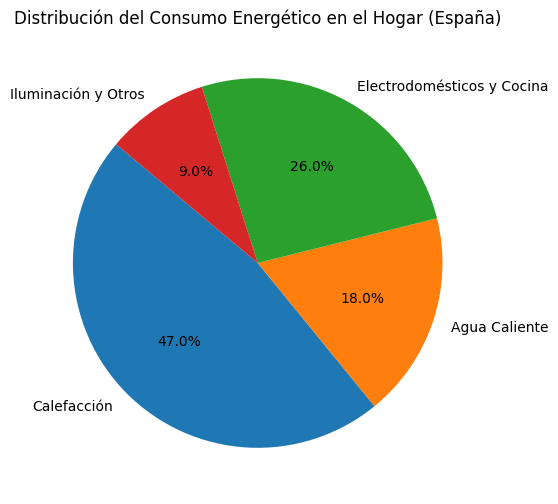

In [46]:
# Datos aproximados para el consumo energético
categories = ['Calefacción', 'Agua Caliente', 'Electrodomésticos y Cocina', 'Iluminación y Otros']
percentages = [47, 18, 26, 9]

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Distribución del Consumo Energético en el Hogar (España)')
plt.show()


### **Conclusión**
Estos datos subrayan la importancia de mejorar la eficiencia energética en los edificios residenciales para reducir tanto el consumo de energía como las emisiones de carbono.

## Argumentación: Por qué este Proyecto de Machine Learning es Sólido y el Target es Relevante

### **1. Viabilidad como Proyecto de Machine Learning**
Este proyecto utiliza un enfoque de **clasificación supervisada**, que es una de las aplicaciones más comunes y efectivas del Machine Learning. Las razones que lo hacen sólido son:

#### **a) Estructura clara del problema**
- **Variable objetivo definida:** El plazo de intervención (`2030`, `2033`, o `No cumple`) es una variable categórica bien delimitada, ideal para algoritmos de clasificación.
- **Variables predictoras relevantes:** Los datos incluyen múltiples características clave como costos de intervención, calificaciones energéticas y características estructurales de los edificios.

#### **b) Impacto de los resultados**
La clasificación tiene un impacto práctico directo, permitiendo:
- Priorizar intervenciones energéticas.
- Optimizar recursos en sectores públicos y privados.
- Acelerar el cumplimiento de objetivos normativos y climáticos.

#### **c) Abundancia de datos**
El dataset incluye información detallada y estructurada, facilitando el entrenamiento de modelos predictivos robustos.

---

### **2. Relevancia del Target**

#### **Constructoras**
- **Por qué son clave:**  
  Constructoras buscan proyectos con alto retorno económico y eficiencia operativa. Este modelo les permite identificar edificios que ofrecen:
  - Menores costos relativos de intervención.
  - Alta rentabilidad por mejoras en eficiencia energética.
- **Impacto:**  
  Mejora su capacidad para planificar recursos, captar nuevos proyectos y cumplir con plazos normativos.

#### **Financieras**
- **Por qué son clave:**  
  Las entidades financieras están interesadas en evaluar el riesgo y diseñar productos financieros (hipotecas verdes, préstamos sostenibles) dirigidos a proyectos energéticamente eficientes.
- **Impacto:**  
  Permite identificar edificios con bajo riesgo financiero y alto retorno, alineando sus inversiones con criterios ESG (ambientales, sociales y de gobernanza).

#### **Administraciones Públicas**
- **Por qué son clave:**  
  Las administraciones necesitan dirigir ayudas a edificios con mayor necesidad e impacto social. Este modelo les ayuda a:
  - Identificar zonas prioritarias.
  - Justificar políticas públicas basadas en datos.
- **Impacto:**  
  Optimiza la inversión pública y contribuye al cumplimiento de normativas energéticas.

---

### **3. Oportunidad Comercial**
El proyecto se alinea perfectamente con una **oportunidad de negocio real**, abordando el mercado de rehabilitación energética, que está en expansión debido a:
- **Normativas europeas y españolas:** Exigen mejoras en eficiencia energética para 2030 y 2033.
- **Inversión en sostenibilidad:** Los Fondos Next Generation EU están incentivando estas transformaciones.

#### **Segmentos de mercado relevantes:**
1. **Constructoras:** Mercado de proyectos de rehabilitación energética residencial.
2. **Financieras:** Creciente demanda de productos financieros sostenibles.
3. **Administraciones:** Necesidad de cumplir con normativas climáticas de forma eficiente.

---

### **4. Escalabilidad del Proyecto**
- **Replicable:** Puede aplicarse a otras ciudades o regiones con características similares.
- **Datos adicionales:** Escalando con datos más amplios (nacional o europeo), se podría automatizar la planificación energética a gran escala.
- **Ajustable:** Puede adaptarse a diferentes tipos de edificios o sectores (comercial, industrial).

---

### **Conclusión**
Este proyecto no solo es sólido desde el punto de vista técnico, sino que también aborda una necesidad real en un sector estratégico. Su relevancia radica en:
1. Resolver problemas normativos y comerciales críticos.
2. Impactar positivamente en actores clave (constructoras, financieras, administraciones).
3. Aprovechar tendencias globales de sostenibilidad y eficiencia energética.


In [47]:
# Cargar el CSV en un DataFrame
df = pd.read_csv('data/48020.csv')

In [48]:
df.head()

,Unnamed: 0,referencia_catastral,codigo_ine,nombre_municipio,codigo_provincia,zona_climatica,uso_principal,altura_maxima,altura_maxima_categoria,tipologia_edificio,...,superficie_vivienda,numero_viviendas,numero_viviendas_categoria,cluster,demanda_calefaccion,demanda_calefaccion_post_interverncion,calificacion_demanda_calefaccion,calificacion_demanda_calefaccion_post_intervencion,coste_intervencion_m2,coste_intervencion_viv
0,0,4802010101001,48020,Bilbao,48,C1,Común,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4802081399166,48020,Bilbao,48,C1,Aparcamiento,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4802081399168,48020,Bilbao,48,C1,Almacenaje,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4802081399167,48020,Bilbao,48,C1,Almacenaje,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4802081399169,48020,Bilbao,48,C1,Almacenaje,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11405 entries, 0 to 11404
Data columns (total 22 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Unnamed: 0                                          11405 non-null  int64  
 1   referencia_catastral                                11405 non-null  int64  
 2   codigo_ine                                          11405 non-null  int64  
 3   nombre_municipio                                    11405 non-null  object 
 4   codigo_provincia                                    11405 non-null  int64  
 5   zona_climatica                                      11405 non-null  object 
 6   uso_principal                                       11405 non-null  object 
 7   altura_maxima                                       8564 non-null   float64
 8   altura_maxima_categoria                             8564 non-null   object 


In [50]:
df.describe()

,Unnamed: 0,referencia_catastral,codigo_ine,codigo_provincia,altura_maxima,ano_construccion,superficie_vivienda,numero_viviendas,demanda_calefaccion,demanda_calefaccion_post_interverncion,coste_intervencion_m2,coste_intervencion_viv
count,11405.000000,1.140500e+04,11405.0,11405.0,8564.000000,8564.000000,8404.000000,11405.000000,8564.000000,8564.000000,8564.000000,8404.000000
mean,5702.000000,4.802050e+12,48020.0,48.0,5.141990,1950.479449,1641.873751,14.417536,76.090870,24.739019,80.938884,7644.032370
std,3292.484244,2.342735e+07,0.0,0.0,2.895819,31.542151,2063.114937,22.364553,32.493175,6.679430,23.601817,5306.814962
min,0.000000,4.802010e+12,48020.0,48.0,-3.000000,1700.000000,3.000000,0.000000,22.450000,12.480000,0.000000,475.040000
25%,2851.000000,4.802023e+12,48020.0,48.0,3.000000,1930.000000,441.750000,1.000000,58.260000,20.740000,62.270000,4939.397500
50%,5702.000000,4.802053e+12,48020.0,48.0,5.000000,1958.000000,1142.500000,9.000000,69.650000,24.470000,72.640000,6275.830000
75%,8553.000000,4.802072e+12,48020.0,48.0,7.000000,1969.000000,2061.250000,20.000000,74.030000,25.040000,88.870000,8439.752500
max,11404.000000,4.802082e+12,48020.0,48.0,27.000000,2017.000000,38495.000000,535.000000,155.260000,52.390000,150.380000,175984.520000


<Figure size 3000x3000 with 0 Axes>

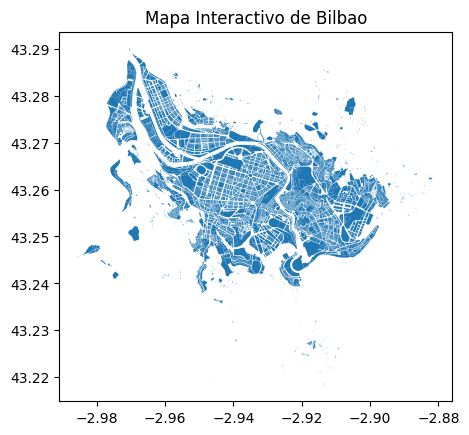

In [51]:
# Cargar el archivo GeoPackage
gdf = gpd.read_file('data/48020.gpkg')

# Configurar el tamaño de la figura
plt.figure(figsize=(30, 30))  # Ajusta el tamaño a tus necesidades (ancho, alto en pulgadas)

# Visualizar el mapa
gdf.plot()
plt.title("Mapa Interactivo de Bilbao")  # Título
plt.show()

In [52]:
gdf.head()

,referencia_catastral,codigo_ine,nombre_municipio,codigo_provincia,zona_climatica,uso_principal,altura_maxima,altura_maxima_categoria,tipologia_edificio,ano_construccion,...,numero_viviendas,numero_viviendas_categoria,cluster,demanda_calefaccion,demanda_calefaccion_post_interverncion,calificacion_demanda_calefaccion,calificacion_demanda_calefaccion_post_intervencion,coste_intervencion_m2,coste_intervencion_viv,geometry
0,4802010101001,48020,Bilbao,48,C1,Común,NaN,None,None,NaN,...,0,None,None,NaN,NaN,None,None,NaN,NaN,"MULTIPOLYGON (((-2.97034 43.29004, -2.97032 43..."
1,4802081399166,48020,Bilbao,48,C1,Aparcamiento,NaN,None,None,NaN,...,0,None,None,NaN,NaN,None,None,NaN,NaN,"MULTIPOLYGON (((-2.95852 43.25414, -2.9585 43...."
2,4802081399168,48020,Bilbao,48,C1,Almacenaje,NaN,None,None,NaN,...,0,None,None,NaN,NaN,None,None,NaN,NaN,"MULTIPOLYGON (((-2.95439 43.25327, -2.95442 43..."
3,4802081399167,48020,Bilbao,48,C1,Almacenaje,NaN,None,None,NaN,...,0,None,None,NaN,NaN,None,None,NaN,NaN,"MULTIPOLYGON (((-2.95448 43.25322, -2.95454 43..."
4,4802081399169,48020,Bilbao,48,C1,Almacenaje,NaN,None,None,NaN,...,0,None,None,NaN,NaN,None,None,NaN,NaN,"MULTIPOLYGON (((-2.95956 43.25371, -2.9596 43...."


In [53]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11405 entries, 0 to 11404
Data columns (total 22 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   referencia_catastral                                11405 non-null  object  
 1   codigo_ine                                          11405 non-null  object  
 2   nombre_municipio                                    11405 non-null  object  
 3   codigo_provincia                                    11405 non-null  object  
 4   zona_climatica                                      11405 non-null  object  
 5   uso_principal                                       11405 non-null  object  
 6   altura_maxima                                       8564 non-null   float64 
 7   altura_maxima_categoria                             8564 non-null   object  
 8   tipologia_edificio                                  8564 n

In [54]:
gdf.describe()

,altura_maxima,ano_construccion,superficie_vivienda,numero_viviendas,demanda_calefaccion,demanda_calefaccion_post_interverncion,coste_intervencion_m2,coste_intervencion_viv
count,8564.000000,8564.000000,8404.000000,11405.000000,8564.000000,8564.000000,8564.000000,8404.000000
mean,5.141990,1950.479449,1641.873751,14.417536,76.090870,24.739019,80.938884,7644.032370
std,2.895819,31.542151,2063.114937,22.364553,32.493175,6.679430,23.601817,5306.814962
min,-3.000000,1700.000000,3.000000,0.000000,22.450000,12.480000,0.000000,475.040000
25%,3.000000,1930.000000,441.750000,1.000000,58.260000,20.740000,62.270000,4939.397500
50%,5.000000,1958.000000,1142.500000,9.000000,69.650000,24.470000,72.640000,6275.830000
75%,7.000000,1969.000000,2061.250000,20.000000,74.030000,25.040000,88.870000,8439.752500
max,27.000000,2017.000000,38495.000000,535.000000,155.260000,52.390000,150.380000,175984.520000


In [55]:
# Seleccionar columnas específicas del CSV
csv_columns_to_use = [
    'referencia_catastral', 'uso_principal', 'altura_maxima', 'tipologia_edificio',
    'ano_construccion', 'superficie_vivienda', 'numero_viviendas',
    'demanda_calefaccion', 'demanda_calefaccion_post_interverncion',
    'calificacion_demanda_calefaccion', 'calificacion_demanda_calefaccion_post_intervencion',
    'coste_intervencion_m2', 'coste_intervencion_viv'
]
df_filtered = df[csv_columns_to_use]

# Inspeccionar las primeras filas de las columnas seleccionadas
print("CSV Filtrado:")

# Seleccionar columnas específicas del GeoPackage
geo_columns_to_use = ['referencia_catastral', 'geometry']  # Mantén geometry para visualización
gdf_filtered = gdf[geo_columns_to_use]

# Inspeccionar las primeras filas de las columnas seleccionadas
print("GeoPackage Filtrado:")


CSV Filtrado:
GeoPackage Filtrado:


In [56]:
# Filtrar el DataFrame del CSV para incluir solo uso_principal == 'residencial'
df_residencial = df_filtered[df_filtered['uso_principal'].str.lower() == 'residencial']

# Verificar el número de filas después del filtrado
print(f"Número de edificios residenciales: {df_residencial.shape[0]}")

Número de edificios residenciales: 8260


In [57]:
df_residencial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8260 entries, 7 to 11404
Data columns (total 13 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   referencia_catastral                                8260 non-null   int64  
 1   uso_principal                                       8260 non-null   object 
 2   altura_maxima                                       8260 non-null   float64
 3   tipologia_edificio                                  8260 non-null   object 
 4   ano_construccion                                    8260 non-null   float64
 5   superficie_vivienda                                 8117 non-null   float64
 6   numero_viviendas                                    8260 non-null   int64  
 7   demanda_calefaccion                                 8260 non-null   float64
 8   demanda_calefaccion_post_interverncion              8260 non-null   float64
 9   c

In [58]:
# Filtrar el DataFrame para incluir solo las calificaciones E, F, y G
df_residencial_filtrado = df_residencial[
    df_residencial['calificacion_demanda_calefaccion'].str.upper().isin(['E', 'F', 'G'])
]

# Verificar el número de filas después del filtrado
print(f"Número de edificios con calificación E, F o G: {df_residencial_filtrado.shape[0]}")


Número de edificios con calificación E, F o G: 7383


In [59]:
df_residencial_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7383 entries, 7 to 11404
Data columns (total 13 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   referencia_catastral                                7383 non-null   int64  
 1   uso_principal                                       7383 non-null   object 
 2   altura_maxima                                       7383 non-null   float64
 3   tipologia_edificio                                  7383 non-null   object 
 4   ano_construccion                                    7383 non-null   float64
 5   superficie_vivienda                                 7382 non-null   float64
 6   numero_viviendas                                    7383 non-null   int64  
 7   demanda_calefaccion                                 7383 non-null   float64
 8   demanda_calefaccion_post_interverncion              7383 non-null   float64
 9   c

In [60]:
# Eliminar filas con valores nulos
df_residencial_filtrado = df_residencial_filtrado.dropna()

# Verificar el número de filas después de eliminar los nulos
print(f"Número de filas después de eliminar nulos: {df_residencial_filtrado.shape[0]}")

Número de filas después de eliminar nulos: 7382


In [61]:
df_residencial_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7382 entries, 7 to 11404
Data columns (total 13 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   referencia_catastral                                7382 non-null   int64  
 1   uso_principal                                       7382 non-null   object 
 2   altura_maxima                                       7382 non-null   float64
 3   tipologia_edificio                                  7382 non-null   object 
 4   ano_construccion                                    7382 non-null   float64
 5   superficie_vivienda                                 7382 non-null   float64
 6   numero_viviendas                                    7382 non-null   int64  
 7   demanda_calefaccion                                 7382 non-null   float64
 8   demanda_calefaccion_post_interverncion              7382 non-null   float64
 9   c

In [64]:
# Convertir ambas columnas al mismo tipo (int64) para la unión
gdf_filtered['referencia_catastral'] = gdf_filtered['referencia_catastral'].astype(str)  # Convertir a cadena
df_residencial_filtrado['referencia_catastral'] = df_residencial_filtrado['referencia_catastral'].astype(str)  # Convertir a cadena

# Realizar la unión
merged_data = gdf_filtered.merge(df_residencial_filtrado, on='referencia_catastral', how='inner')

# Mostrar las primeras filas y confirmar la cantidad de filas unidas
print(f"Número de filas unidas: {merged_data.shape[0]}")


Número de filas unidas: 7382


c:\Users\mikel\AppData\Local\Programs\Python\Python39\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [65]:
merged_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7382 entries, 0 to 7381
Data columns (total 14 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   referencia_catastral                                7382 non-null   object  
 1   geometry                                            7382 non-null   geometry
 2   uso_principal                                       7382 non-null   object  
 3   altura_maxima                                       7382 non-null   float64 
 4   tipologia_edificio                                  7382 non-null   object  
 5   ano_construccion                                    7382 non-null   float64 
 6   superficie_vivienda                                 7382 non-null   float64 
 7   numero_viviendas                                    7382 non-null   int64   
 8   demanda_calefaccion                                 7382 non

Valores únicos en 'tipologia_edificio':
[nan]

Columnas finales del DataFrame:
Index(['referencia_catastral', 'geometry', 'altura_maxima',
       'tipologia_edificio', 'ano_construccion', 'superficie_vivienda',
       'numero_viviendas', 'demanda_calefaccion',
       'demanda_calefaccion_post_interverncion',
       'calificacion_demanda_calefaccion',
       'calificacion_demanda_calefaccion_post_intervencion',
       'coste_intervencion_m2', 'coste_intervencion_viv'],
      dtype='object')


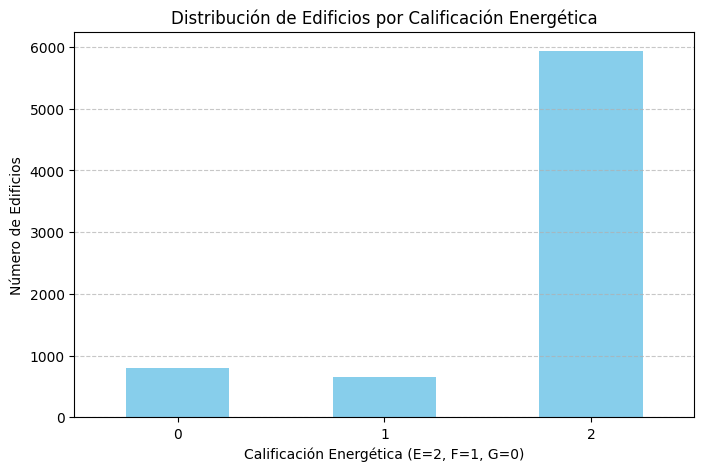

In [68]:
import matplotlib.pyplot as plt

# Eliminar la columna 'uso_principal' porque ya no es relevante
merged_data = merged_data.drop(columns=['uso_principal'])

# Transformar 'tipologia_edificio' en "unifamiliar" y "plurifamiliar"
tipologia_map = {'unifamiliar': 1, 'plurifamiliar': 2}  # Ajustar según valores reales
merged_data['tipologia_edificio'] = merged_data['tipologia_edificio'].map(tipologia_map)

# Verificar los valores únicos después de la transformación
print("Valores únicos en 'tipologia_edificio':")
print(merged_data['tipologia_edificio'].unique())

# Verificar las columnas después de los ajustes
print("\nColumnas finales del DataFrame:")
print(merged_data.columns)

# Visualización simple: Distribución de edificios según calificación energética
plt.figure(figsize=(8, 5))
merged_data['calificacion_demanda_calefaccion'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Distribución de Edificios por Calificación Energética")
plt.xlabel("Calificación Energética (E=2, F=1, G=0)")
plt.ylabel("Número de Edificios")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



<Figure size 500000x500000 with 0 Axes>

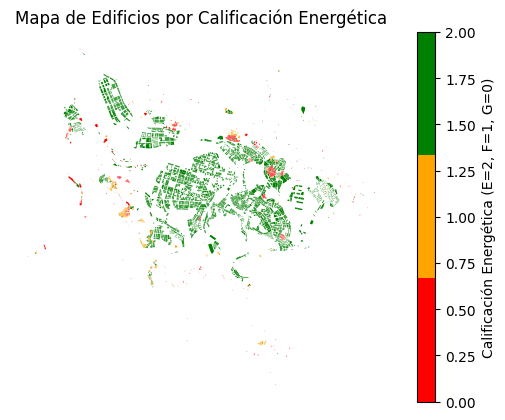

In [75]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Crear una columna de colores basada en la calificación energética
color_map = {0: 'red', 1: 'orange', 2: 'green'}  # G=0 (rojo), F=1 (naranja), E=2 (verde)
merged_data['color'] = merged_data['calificacion_demanda_calefaccion'].map(color_map)

# Crear una escala de colores personalizada
cmap = ListedColormap(['red', 'orange', 'green'])  # Rojo, Naranja, Verde

# Configurar el tamaño del mapa
plt.figure(figsize=(5000, 5000))

# Graficar los datos geográficos con la escala personalizada
merged_data.plot(
    column='calificacion_demanda_calefaccion',
    cmap=cmap,  # Usar la escala personalizada
    legend=True,
    legend_kwds={'label': "Calificación Energética (E=2, F=1, G=0)"}
)

# Agregar título y mostrar el mapa
plt.title("Mapa de Edificios por Calificación Energética")
plt.axis('off')  # Ocultar ejes
plt.show()


In [73]:
# Crear una columna de colores basada en la calificación energética
color_map = {0: 'red', 1: 'orange', 2: 'green'}  # G=0 (rojo), F=1 (naranja), E=2 (verde)
merged_data['color'] = merged_data['calificacion_demanda_calefaccion'].map(color_map)

# Exportar el GeoDataFrame a GeoPackage
output_file_path = 'edificios_calificacion.gpkg'
merged_data.to_file(output_file_path, driver='GPKG')

print(f"Archivo exportado exitosamente a: {output_file_path}")




Archivo exportado exitosamente a: edificios_calificacion.gpkg
